In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!python3 -m spacy download en_core_web_sm

In [74]:
df = pd.read_csv('archive/Resume/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [75]:
df['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [76]:
df['Resume_html'][0]

'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME500375979" style="\n      padding-top:0px;\n    "> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_500375979_1_326506904" style="\n      padding-top:0px;\n    "> <div class="name" itemprop="name"> <span class="field fName" id="500375979FNAM1"> </span> <span> </span> <span class="field" id="500375979LNAM1"> HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR</span> </div> </div> </div> <div class="section" id="SECTION_SUMM500375981" style="\n      padding-top:0px;\n    "> <div class="heading bottomborder"> <div class="sectiontitle" id="SECTNAME_SUMM500375981"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_500375981_1_326506917" style="\n      padding-top:0px;\n    "> <div class="field singlecolumn" id="500375981FRFM1"> <p align="LEFT"> Dedicated Customer Service Manager with 15+ years of experience in H

In [77]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

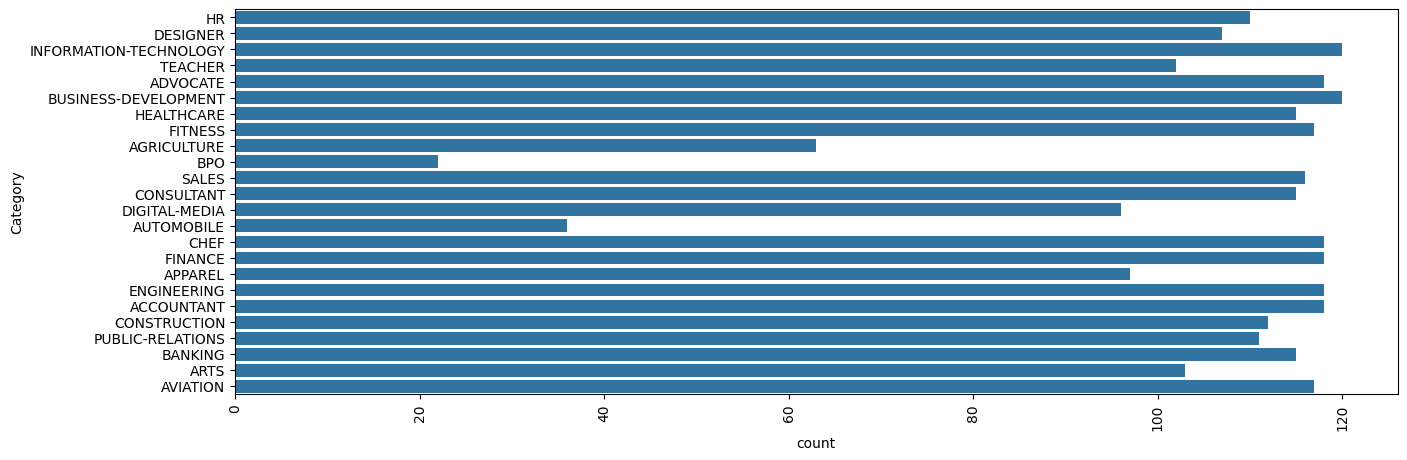

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()


In [79]:
df.dropna(inplace=True)

In [80]:
df = df[['Resume_str', 'Category']].rename(columns={'Resume_str': 'resume','Category':'category'})
df.head()

,resume,category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [81]:
max_size = max(df['category'].value_counts())
balanced_df = df.groupby('category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True) 
balanced_df['category'].value_counts()

/tmp/ipykernel_304053/1296963337.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


category
ACCOUNTANT                120
ADVOCATE                  120
AGRICULTURE               120
APPAREL                   120
ARTS                      120
AUTOMOBILE                120
AVIATION                  120
BANKING                   120
BPO                       120
BUSINESS-DEVELOPMENT      120
CHEF                      120
CONSTRUCTION              120
CONSULTANT                120
DESIGNER                  120
DIGITAL-MEDIA             120
ENGINEERING               120
FINANCE                   120
FITNESS                   120
HEALTHCARE                120
HR                        120
INFORMATION-TECHNOLOGY    120
PUBLIC-RELATIONS          120
SALES                     120
TEACHER                   120
Name: count, dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
balanced_df['encoded_label'] = le.fit_transform(balanced_df['category'])
balanced_df['encoded_label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [88]:
for label, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{label} : {encoded}")


ACCOUNTANT : 0
ADVOCATE : 1
AGRICULTURE : 2
APPAREL : 3
ARTS : 4
AUTOMOBILE : 5
AVIATION : 6
BANKING : 7
BPO : 8
BUSINESS-DEVELOPMENT : 9
CHEF : 10
CONSTRUCTION : 11
CONSULTANT : 12
DESIGNER : 13
DIGITAL-MEDIA : 14
ENGINEERING : 15
FINANCE : 16
FITNESS : 17
HEALTHCARE : 18
HR : 19
INFORMATION-TECHNOLOGY : 20
PUBLIC-RELATIONS : 21
SALES : 22
TEACHER : 23


In [89]:
balanced_df.head()

,resume,category,encoded_label
0,ACCOUNTANT Summary Flexible...,ACCOUNTANT,0
1,ACCOUNTANT Professional Summa...,ACCOUNTANT,0
2,SENIOR ACCOUNTANT Professional ...,ACCOUNTANT,0
3,ACCOUNTANT Summary Senio...,ACCOUNTANT,0
4,ACCOUNTANT I Summary Flexib...,ACCOUNTANT,0


In [90]:
balanced_df['resume'][0]

"         ACCOUNTANT       Summary     Flexible\xa0accountant who adapts seamlessly to constantly evolving accounting processes and technology.  Seasoned staff accountant with ten year background in\xa0accounting. Core competencies include detailed oriented, organized, and as well as excellent communication and time management skills. Handles tasks with accuracy and efficiency. Passionate and  motivated, with a drive for excellence.          Highlights        Microsoft Excel (v-lookups, macros, pivot tables), Microsoft PowerPoint, Microsoft Access, Microsoft Word, Microsoft Outlook, JD Edwards/AS 400, Microsoft Accounting Office, Image Freeway, QuickBooks, SAP, LX, SAGE              Experience      Accountant  ,   10/2014   －   Current    Company Name   －   City  ,   State      Manage Construction in Progress Accounts, depreciation, additions, transfers, & dispositions of tangible and intangible assets.   Tracked all capital spending against approved capital requests.    Reconcile the 

In [101]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_spacy(text):
    doc = nlp(text) 
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return " ".join(tokens)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.2 kB/s eta 0:00:00m eta 0:00:010:00:08

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [102]:
import re
def clean_resume_text(text):
    text = text.lower()  # Normalize case
    text = re.sub(r'\n+', ' ', text)  # Remove newlines
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    text = re.sub(r"http\S+|www\S+", '', text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9.,;!?()&%-]", ' ', text)  # Remove unwanted symbols
    text = re.sub(r'\b\d{10,}\b', '', text)  # Remove long numbers (e.g., phone numbers)
    text = preprocess_spacy(text)
    return text.strip()

In [103]:
balanced_df['resume'] = balanced_df['resume'].apply(clean_resume_text)
balanced_df['resume'][0]

'accountant summary flexible accountant adapt seamlessly constantly evolve accounting process technology seasoned staff accountant year background accounting core competency include detailed orient organize excellent communication time management skill handle task accuracy efficiency passionate motivate drive excellence highlight microsoft excel v lookup macro pivot table microsoft powerpoint microsoft access microsoft word microsoft outlook jd edwards microsoft accounting office image freeway quickbook sap lx sage experience accountant current company city state manage construction progress account depreciation addition transfer disposition tangible intangible asset track capital spending approve capital request reconcile fix asset subsidiary ledger generate monthly ad hoc report effectively complete monthly roll forward record maintain capital lease create monitor system control procedure form recordation fix asset assist cycle accounting financial reporting month end close prepare m

In [104]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(balanced_df['resume'],balanced_df['category'],test_size=0.2,shuffle=True,stratify=None)

In [105]:
x_train.shape

(2304,)

In [106]:
y_test.shape

(576,)

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,stop_words='english')),
    ('clf', LogisticRegression())
])

lr.fit(x_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('clf', LogisticRegression())])

In [111]:
from sklearn.metrics import classification_report
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.74      1.00      0.85        23
              ADVOCATE       0.68      0.71      0.69        24
           AGRICULTURE       0.86      0.82      0.84        22
               APPAREL       0.80      0.76      0.78        21
                  ARTS       0.85      0.53      0.65        32
            AUTOMOBILE       1.00      0.53      0.70        30
              AVIATION       0.80      0.87      0.83        23
               BANKING       0.87      0.69      0.77        29
                   BPO       0.94      1.00      0.97        16
  BUSINESS-DEVELOPMENT       0.60      0.88      0.71        24
                  CHEF       0.81      0.81      0.81        21
          CONSTRUCTION       0.91      1.00      0.95        20
            CONSULTANT       0.38      0.21      0.27        14
              DESIGNER       0.80      0.71      0.75        28
         DIGITAL-MEDIA       0.95      

In [108]:
new_resumes = [
    "Skilled in machine learning, Python, and data visualization.",
    "5 years of experience in project management and agile methodologies."
]

predictions = lr.predict(new_resumes)
print(predictions)


['AGRICULTURE' 'ENGINEERING']


In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer

gnb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('clf', GaussianNB())
])

gnb.fit(x_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7bf2758400e0>)),
                ('clf', GaussianNB())])

In [113]:
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.78      0.78      0.78        23
              ADVOCATE       0.64      0.67      0.65        24
           AGRICULTURE       0.90      0.86      0.88        22
               APPAREL       0.83      0.71      0.77        21
                  ARTS       0.81      0.69      0.75        32
            AUTOMOBILE       1.00      0.87      0.93        30
              AVIATION       0.67      0.87      0.75        23
               BANKING       0.92      0.76      0.83        29
                   BPO       1.00      1.00      1.00        16
  BUSINESS-DEVELOPMENT       0.67      0.67      0.67        24
                  CHEF       0.88      0.71      0.79        21
          CONSTRUCTION       0.74      0.85      0.79        20
            CONSULTANT       0.24      0.57      0.34        14
              DESIGNER       0.77      0.71      0.74        28
         DIGITAL-MEDIA       0.66      

In [114]:
new_resumes = [
    "Skilled in machine learning, Python, and data visualization.",
    "5 years of experience in project management and agile methodologies."
]

predictions = gnb.predict(new_resumes)
print(predictions)


['AGRICULTURE' 'INFORMATION-TECHNOLOGY']


In [115]:

from sklearn.neighbors import KNeighborsClassifier

knc = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,stop_words='english')),
    ('clf', KNeighborsClassifier())
])

knc.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('clf', KNeighborsClassifier())])

In [116]:
from sklearn.metrics import classification_report
y_pred = knc.predict(x_test)
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.44      0.87      0.59        23
              ADVOCATE       0.42      0.42      0.42        24
           AGRICULTURE       0.63      0.77      0.69        22
               APPAREL       0.29      0.48      0.36        21
                  ARTS       0.52      0.41      0.46        32
            AUTOMOBILE       0.55      0.57      0.56        30
              AVIATION       0.59      0.57      0.58        23
               BANKING       0.57      0.45      0.50        29
                   BPO       0.60      0.94      0.73        16
  BUSINESS-DEVELOPMENT       0.52      0.50      0.51        24
                  CHEF       0.83      0.71      0.77        21
          CONSTRUCTION       0.77      0.85      0.81        20
            CONSULTANT       0.22      0.14      0.17        14
              DESIGNER       0.65      0.71      0.68        28
         DIGITAL-MEDIA       0.75      

In [118]:
new_resumes = [
    "Skilled in machine learning, Python, and data visualization.",
    "5 years of experience in project management and agile methodologies."
]

predictions =knc.predict(new_resumes)
print(predictions)


['AGRICULTURE' 'INFORMATION-TECHNOLOGY']


In [117]:
from sklearn.ensemble import RandomForestClassifier

rfc = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,stop_words='english')),
    ('clf', RandomForestClassifier())
])

rfc.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('clf', RandomForestClassifier())])

In [119]:
from sklearn.metrics import classification_report
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.79      1.00      0.88        23
              ADVOCATE       0.76      0.92      0.83        24
           AGRICULTURE       0.91      0.91      0.91        22
               APPAREL       0.84      0.76      0.80        21
                  ARTS       0.91      0.66      0.76        32
            AUTOMOBILE       0.90      0.87      0.88        30
              AVIATION       0.96      1.00      0.98        23
               BANKING       0.96      0.79      0.87        29
                   BPO       1.00      1.00      1.00        16
  BUSINESS-DEVELOPMENT       0.88      0.88      0.88        24
                  CHEF       0.77      0.95      0.85        21
          CONSTRUCTION       0.95      1.00      0.98        20
            CONSULTANT       0.64      0.64      0.64        14
              DESIGNER       0.83      0.86      0.84        28
         DIGITAL-MEDIA       0.87      

In [ ]:
new_resumes = [
    "Expert in financial statements, tax returns, and auditing processes.",
    "Represents clients in court, provides legal advice, and prepares legal documents.",
    "Skilled in crop cultivation, farming techniques, and soil health management.",
    "Experienced in fashion trends, garment manufacturing, and clothing design.",
    "Creative professional working in painting, sculpture, or performance arts.",
    "Specialized in vehicle design, automotive repair, and mechanical engineering.",
    "Licensed pilot or technician with expertise in aircraft operation and maintenance.",
    "Handles financial services, loan processing, and investment management.",
    "Provides customer support, back-office processing, and telecommunication services.",
    "Focuses on market expansion, lead generation, and client acquisition.",
    "Experienced in culinary arts, food preparation, and kitchen management.",
    "Manages building projects, site supervision, and structural engineering.",
    "Offers expert advice in business strategy, operations, or IT solutions.",
    "Creates visual concepts for digital or print using design software and tools.",
    "Produces content for online platforms, social media, and digital marketing.",
    "Applies technical skills in mechanical, electrical, or civil engineering fields.",
    "Manages investments, budgets, and financial risk assessments.",
    "Guides physical training, wellness plans, and exercise routines.",
    "Provides medical care, diagnosis, and treatment to patients.",
    "Handles recruitment, employee relations, and human resource policies.",
    "Develops software, manages networks, and supports IT infrastructure.",
    "Manages media relations, brand image, and communication strategy.",
    "Drives product sales, meets targets, and maintains client relationships."
]

categories = [
    "ACCOUNTANT",
    "ADVOCATE",
    "AGRICULTURE",
    "APPAREL",
    "ARTS",
    "AUTOMOBILE",
    "AVIATION",
    "BANKING",
    "BPO",
    "BUSINESS-DEVELOPMENT",
    "CHEF",
    "CONSTRUCTION",
    "CONSULTANT",
    "DESIGNER",
    "DIGITAL-MEDIA",
    "ENGINEERING",
    "FINANCE",
    "FITNESS",
    "HEALTHCARE",
    "HR",
    "INFORMATION-TECHNOLOGY",
    "PUBLIC-RELATIONS",
    "SALES"
]
predictions =rfc.predict(new_resumes)
print(predictions)


['AVIATION' 'AVIATION' 'AVIATION' 'AVIATION' 'AVIATION' 'ENGINEERING'
 'AVIATION' 'AVIATION' 'AVIATION' 'AVIATION' 'CHEF' 'ENGINEERING'
 'AVIATION' 'DIGITAL-MEDIA' 'DIGITAL-MEDIA' 'ENGINEERING' 'AVIATION'
 'FITNESS' 'AVIATION' 'HR' 'AVIATION' 'AVIATION' 'AVIATION']
